In [2]:
import numpy as np, pandas as pd
import PIL.Image
import os
np.set_printoptions(suppress=True)

In [3]:
os.getcwd()

'/Users/matthias/Dropbox/Research/shared/Switch-Hawaii/ge_validation/source_data'

In [3]:
!ls 'Slide 36' | cat

AES.png
Kahe1.png
Kahe2.png
Kahe3.png
Kahe4.png
Kahe56.png
Kalaeloa1.png
Kalaeloa2.png
Renewable_Mid.png
Waiau7.png
Waiau8.png


In [43]:
y_max = 120.0           # maximum y value (power)
y_start = 941.0 - 0.5    # pixel index for y=0.0
y_end = 47.0 - 0.5       # pixel index for y=y_max
x_start = 150.0 - 0.5
x_end = 1581.0 - 0.5
x_max = 71.0            # maximum x value (hour number)

plants = [
    'Kahe1', 'Kahe2', 'Kahe3', 'Kahe4', 'Kahe56', 
    'Kalaeloa1', 'Kalaeloa2', 'Waiau7', 'Waiau8', 
    'AES', 'Renewable_Mid', 
]
powers = dict()
total_powers = dict()
row_vals_dict = dict()
prev_total = None
for p in plants:
    f = os.path.join('Slide 36', p + '.png')
    data = np.asarray(PIL.Image.open(f))
    # relevant parts are white (should have been non-transparent)
    rows, cols = (data[:,:,1] < 127).nonzero()
    row_vals = np.empty(data.shape[:-1])
    row_vals[:] = np.nan
    row_vals[rows, cols] = rows
    row_vals_dict[p] = row_vals
    #with np.errstate(all='ignore'):
    if p == 'Renewable_Mid':
        aggregate = np.nanmean # average vertical value
    else:
        aggregate = np.nanmin  # top edge
    total_power = (aggregate(row_vals, axis=0) - y_start) * y_max / (y_end-y_start)
    total_powers[p] = total_power
    if prev_total is None:
        prev_total = np.zeros(total_power.shape)
    power = np.nan_to_num(total_power - prev_total)
    prev_total += power
    powers[p] = power
powers

/Users/matthias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: All-NaN axis encountered
/Users/matthias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: Mean of empty slice


{'AES': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kahe1': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kahe2': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kahe3': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kahe4': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kahe56': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kalaeloa1': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Kalaeloa2': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Renewable_Mid': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Waiau7': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'Waiau8': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}

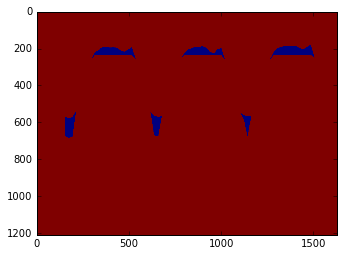

In [45]:
data = np.asarray(PIL.Image.open('Slide 36/AES.png'))
# pd.DataFrame(data[:, :, 1]).iloc[535:580, 150:170]
pyplot.imshow(data[:, :, 1])
# data.shape

In [46]:
pd.DataFrame(row_vals_dict['AES']).iloc[535:580, 150:170]

,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
total_powers['AES']

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

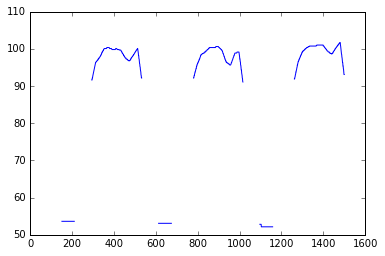

In [19]:
%matplotlib inline
from matplotlib import pyplot
pyplot.plot(total_powers['AES'])

In [5]:
powers['AES']

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [47]:
df = pd.DataFrame(
    powers, 
    index=(np.arange(len(prev_total)) - x_start) * x_max / (x_end-x_start),
    columns=plants
)
df.loc[0:12]

,Kahe1,Kahe2,Kahe3,Kahe4,Kahe56,Kalaeloa1,Kalaeloa2,Waiau7,Waiau8,AES,Renewable_Mid
0.024808,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.074423,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,49.597315,5.637584
0.124039,0.000000,6.107383,6.577181,5.906040,0.00000,10.335570,0.000000,6.442953,0.000000,14.228188,5.570470
0.173655,0.000000,6.107383,6.577181,5.771812,0.00000,10.335570,0.000000,6.442953,0.000000,14.362416,5.503356
0.223270,0.000000,6.107383,6.577181,5.771812,0.00000,10.335570,0.000000,6.442953,0.000000,14.362416,5.436242
0.272886,0.000000,6.107383,6.577181,5.771812,0.00000,10.335570,0.000000,6.308725,0.000000,14.228188,5.704698
0.322502,0.000000,6.107383,6.577181,5.771812,0.00000,10.335570,0.000000,6.308725,0.000000,14.228188,5.570470
0.372117,0.000000,6.107383,6.577181,5.637584,0.00000,10.469799,0.000000,6.308725,0.000000,14.228188,5.570470
0.421733,0.000000,6.107383,6.577181,5.637584,0.00000,10.201342,0.000000,6.577181,0.000000,14.228188,5.436242
0.471349,0.000000,6.107383,6.577181,5.503356,0.00000,10.335570,0.000000,6.577181,0.000000,14.093960,5.503356


In [48]:
df.loc[0:x_max].to_csv('Slide 36 all pixels.csv')

In [21]:
df.loc[0:x_max]

,Kahe1,Kahe2,Kahe3,Kahe4,Kahe56,Kalaeloa1,Kalaeloa2,Waiau7,Waiau8,AES,Renewable_Mid
0.024808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000
0.074423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,55.234899
0.124039,0.000000,0.201342,6.308725,6.308725,0.000000,6.174497,0,10.335570,0.000000,0,25.838926
0.173655,0.000000,0.201342,6.308725,6.308725,0.000000,6.040268,0,10.335570,0.000000,0,25.906040
0.223270,0.000000,0.201342,6.308725,6.308725,0.000000,6.040268,0,10.335570,0.000000,0,25.838926
0.272886,0.000000,0.201342,6.308725,6.308725,0.000000,5.906040,0,10.469799,0.000000,0,25.838926
0.322502,0.000000,0.201342,6.308725,6.308725,0.000000,5.906040,0,10.469799,0.000000,0,25.704698
0.372117,0.000000,0.201342,6.308725,6.308725,0.000000,5.906040,0,10.201342,0.000000,0,25.973154
0.421733,0.000000,0.201342,6.308725,6.308725,0.000000,5.906040,0,10.201342,0.000000,0,25.838926
0.471349,0.000000,0.201342,6.308725,6.308725,0.000000,5.637584,0,10.469799,0.000000,0,25.771812
